In [2]:
%matplotlib inline

import rasterio
from rasterio.plot import show

Before you can work with raster dataset
you have to first open it.

In [5]:
l=rasterio.open('///home/jovyan/l.tiff')
l

<open DatasetReader name='///home/jovyan/l.tiff' mode='r'>

Check the number of bands (layers).

In [8]:
l.count

1

Each band (layer) is represented as two dimensional array and has fixed size (width/rows,height/columns).

In [9]:
l.width

7941

In [10]:
l.height

8031

To figure out the value range for each data type.
First you need to find band's index:

In [11]:
l.indexes

(1,)

Then the matching data type. (You can find a handly cheatset about the meaning of data types here: http://my.math.wsu.edu/help/matlab/uint8.html)

In [12]:
l.dtypes

('uint8',)

Checking which values are considered missing (in our dataset there's no missing data).

In [22]:
l.nodatavals

(None,)

In [24]:
print(l.nodata)

None


Getting the bounding box of a raster.

In [13]:
l.bounds

BoundingBox(left=392985.0, bottom=5762685.0, right=631215.0, top=6003615.0)

Getting the coordinates for upper left corner of the raster.

In [15]:
l.transform * (0,0)

(392985.0, 6003615.0)

Getting coordintes for lower right corner.

In [16]:
l.transform *  (l.width, l.height)

(631215.0, 5762685.0)

Checking the projection of this particular raster data set.

In [18]:
l.crs

CRS({'init': 'epsg:32634'})

**Rading raster data**

Checking the number of bands in raster.

In [19]:
l.indexes

(1,)

Reading a specific band (here's it's the first band).

In [9]:
b1=l.read(1)

The results is a two dimensional array.

In [21]:
b1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

You can access values in a band using 
it's row and colum indexes. Indexes start from 0.

In [11]:
b1[l.height-1, l.width-1]

0

** Spatial indexing. **

Getting pixel from coordinates (here we get the coordinates of ledt upper corner).

In [13]:
row, col = l.index(l.bounds.left, l.bounds.top)
b1[row, col]

0

Getting spatial coordinates of a specific row/column (pixel).

In [14]:
l.xy(l.width-1, l.height-1)

(633900.0, 5765400.0)

Plotting raster data (all bands).

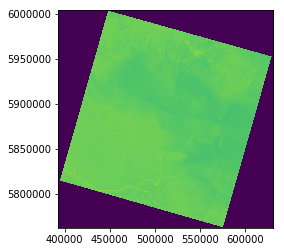

In [19]:
rasterio.plot.show(l.read(), transform=l.transform)

You can also plot a specific band.

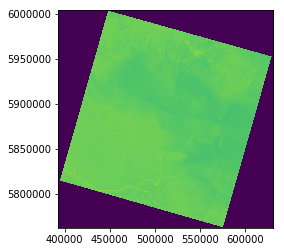

In [20]:
rasterio.plot.show(l.read(1), transform=l.transform)